# **APRENDIZAJE AUTOMATICO - TP 3** 💻

> 🙋🏻‍♂️ **Juan Andres Garcia Alves de Borba** (DNI 30182100)

## Indicaciones básicas

1. Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

2. Cada uno debe completar las consignas indicadas en este notebook.

3. No pueden repetir el mismo dataset que ya haya definido un compañero.

4. Copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5. No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6. Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7. Revise las fecha límite de entrega de este trabajo

## Entrega

**LEA LAS INDICACIONES DE ENTREGA EN EL FORO DE LA TAREA**

#**Tarea: Entrenamiento y Evaluación de Clasificadores**  

**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.

## 📌 Punto 1. **Selección del Dataset**

### 📋 Consignas:

- Elijan un dataset de UCI ML Repository del siguiente enlace:  
https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=10&sort=desc&orderBy=Relevance&search=

- Requisitos:  
  - Debe tener al menos 4 variables.
  - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
  - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.

### 📝 Resolución:

👉🏻 Me basaré en el dataset con id 143: **Statlog: Australian Credit Approval**.  
👉🏻 Este dataset es una muestra de solicitudes de tarjetas de crédito en Australia.

> https://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval.

👉🏻 Instalaciones ...

In [42]:
! pip install ucimlrepo

👉🏻 Importación de librerías y configuraciones generales ...

In [43]:
import numpy as np
import pandas as pd
import warnings
from ucimlrepo import fetch_ucirepo

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [44]:
# suprimir los warnings de reindex de pandas
warnings.filterwarnings("ignore")

# mayor ancho en los 'print()' antes que se generen saltos de línea
np.set_printoptions(linewidth=130)                # saltos de línea (otra opción: linewidth=np.inf)
np.set_printoptions(edgeitems=100)                # mostrar más elementos al principio y final
np.set_printoptions(threshold=np.inf)             # ancho para los arrays (otra opción: np.inf)
pd.set_option('display.width', 200)               # pandas: ancho total permitido
pd.set_option('display.max_columns', None)        # pandas: mostrar todas las columnas
np.set_printoptions(precision=4, suppress=True)   # 4 decimales en lugar de notación científica

👉🏻 Cargar el dataset ...

In [45]:
# fetch del dataset
statlog_australian_credit_approval = fetch_ucirepo(id=143)

👉🏻 Visualizar las descripciones de cada columna...

In [46]:
# información de los datos
# print(statlog_australian_credit_approval.metadata)
print(statlog_australian_credit_approval.variables)

   name     role         type demographic description units missing_values
0    A1  Feature  Categorical        None        None  None             no
1    A2  Feature   Continuous        None        None  None             no
2    A3  Feature   Continuous        None        None  None             no
3    A4  Feature  Categorical        None        None  None             no
4    A5  Feature  Categorical        None        None  None             no
5    A6  Feature  Categorical        None        None  None             no
6    A7  Feature   Continuous        None        None  None             no
7    A8  Feature  Categorical        None        None  None             no
8    A9  Feature  Categorical        None        None  None             no
9   A10  Feature   Continuous        None        None  None             no
10  A11  Feature  Categorical        None        None  None             no
11  A12  Feature  Categorical        None        None  None             no
12  A13  Feature   Contin

👉🏻 Extraer los features ...

In [47]:
# variable 'x' para los features
x = statlog_australian_credit_approval.data.features
y = statlog_australian_credit_approval.data.targets

👉🏻 Inspección inicial ...

In [48]:
print("shapes:", x.shape, y.shape, '\n')  # tamaño de dataset 690 x 14

df = pd.concat([x, y], axis=1)
df.head(3)

shapes: (690, 14) (690, 1) 



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0


👉🏻 Validación por nulos ...

In [49]:
# en lugar de hacer 'x.isnull().sum()', uso 'x.isnull().sum().values' que resulta más compacto de visualizar
print('nulos en el dataset:', x.isnull().sum().values)

nulos en el dataset: [0 0 0 0 0 0 0 0 0 0 0 0 0 0]


👉🏻 Validación por duplicados ...

In [50]:
print('duplicados en el dataset:', x.duplicated().sum())

# en caso que se quisiera eliminar duplicados ...
# x = x.drop_duplicates()
# print("shape:", x.shape, '\n')  # nuevo tamaño de dataset

duplicados en el dataset: 0


👉🏻 Columnas calculadas y conversión de formatos ...

In [51]:
# no aplica

👉🏻 Renombrar los features ...

In [52]:
# no aplica, si hiciera falta se utilizaría algo del estilo:
# x.columns = ['asd 1', 'asd 2', 'asd 3', ... 'asd 14']
# x.head(3)

👉🏻 Observaciones ...

> 👁️‍🗨️ En este dataset, cada observación es una **solicitud para una tarjeta de crédito en Australia**, evaluándose en 14 aspectos (features) denominados A1-A14, que por razones de confidencialidad tienen sus títulos cambiados a símbolos sin significado. (más info en la url del dataset, ver sección `referencias`.)

> 👁️‍🗨️ Este problema de aprendizaje supervisado es del tipo `Clasificación Binaria`, indicando con 0/1 si se denegó/otorgó la tarjeta en cuestión.

> 👁️‍🗨️ El dataset no presenta ni nulos ni duplicados.

## 🔎 Punto 2. **Análisis Exploratorio de Datos**

### 📋 Consignas:

- Describan las variables (media, distribución, outliers).  
- Visualizen:  
  - Histogramas o boxplots para ver distribuciones.  
  - Gráficos de dispersión (scatterplots) entre features y target.  
- Describan si observan o no relaciones entre algunas variables.

### 📝 Resolución:

👉🏻 Media, desviación estadar, mínimos y máximos ...

In [53]:
x.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000


> 👁️‍🗨️ Mucha disparidad en la dispersión de los datos (desviación estandar) entre las distintas features. Por ejemplo `A12` con una desviación estandar de 0.30 y `A14` con 5210.  

> 👁️‍🗨️ Definitivamente va a requerir algo de trabajo al respecto en la sección `Punto 3. Preprocesamiento`.

👉🏻 Histogramas para ver las distribuciones ...

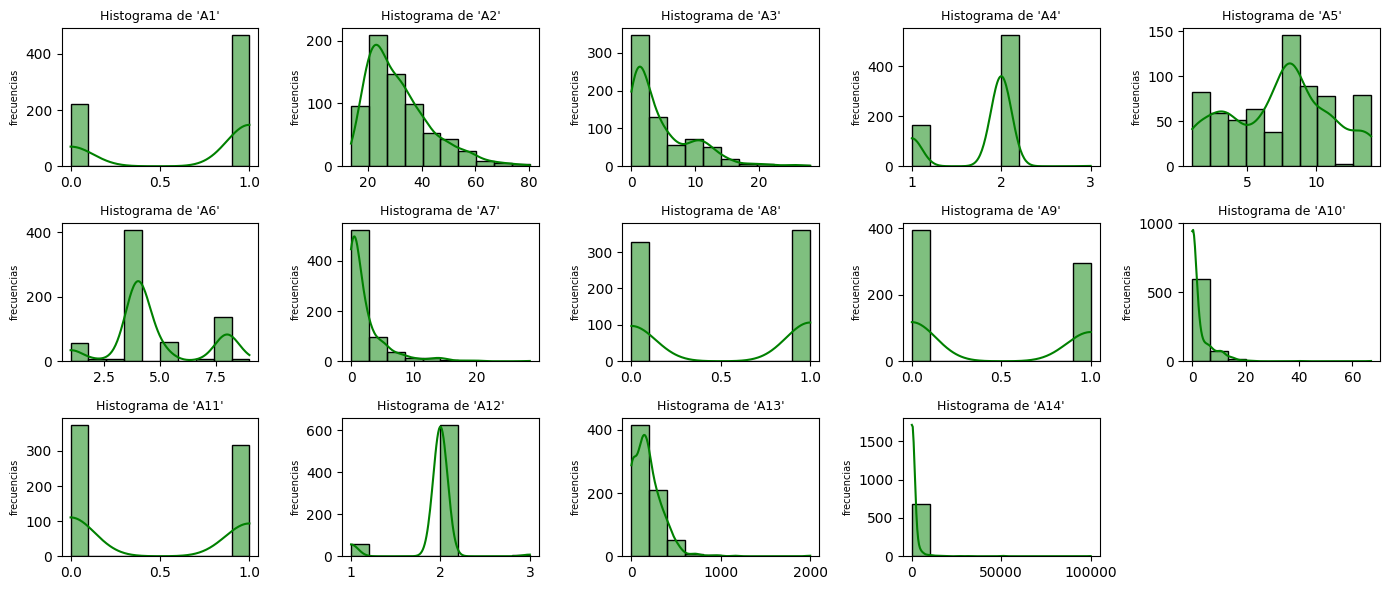

In [54]:
# primero los histogramas... uso un único gráfico para ver todo
plt.figure(figsize=(14, 6))                               # tamaño de la figura

# iterar sobre las columnas para dibujar un histograma para cada una
for i, col in enumerate(x.columns):
  plt.subplot(3, 5, i+1)                                  # 3 filas, 5 columnas, nro de sub-gráfico
  sns.histplot(x[col], kde=True, bins=10, color='green')  # histograma + KDE (estimación de densidad)
  plt.title(f"Histograma de '{ col }'", fontsize=9)       # título del gráfico
  plt.xlabel('')                                          # etiqueta del eje x
  plt.ylabel('frecuencias', fontsize=7, labelpad=4)       # etiqueta del eje y
  plt.tight_layout()                                      # diseño compacto

plt.show()

> 👁️‍🗨️ Feito el dataset que me elegí... 😖

> 👁️‍🗨️ Ya del vamos del histograma se anticipa que `A7`, `A10`, `A13` y `A14` van a estar llenos de outliers... igualmente a continuación graficos los box-plot correspondientes.

> 👁️‍🗨️ Las features `A1`, `A4`, `A5`, `A6`, `A8`, `A9`, `A11` y `A12` son categóricas, lo que explica su rango tan acotado de valores posibles.

> 👁️‍🗨️ El dataset presenta muchos features desbalanceados, dato a tener en cuenta más adelante al momento de evaluar las métricas. Considerar solamente la `accuracy` sería un error.

> 👁️‍🗨️ En las features `A4` y `A12` sus únicas opciones son `1`, `2` o `3`.

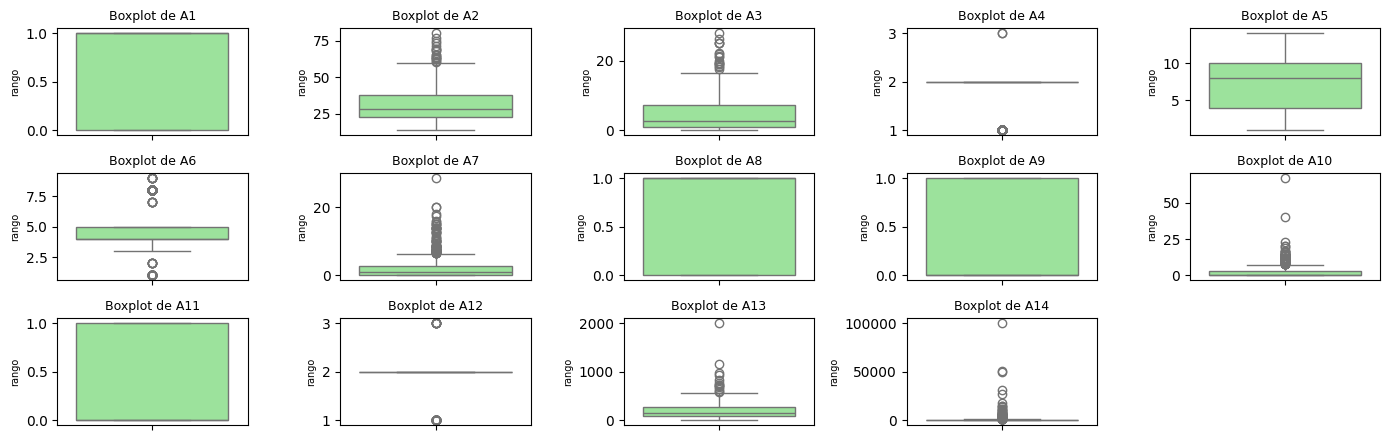

In [55]:
# luego los box-plot... uso un único gráfico para ver todo
plt.figure(figsize=(14, 4.5))                           # tamaño de la figura

# iterar sobre las columnas para dibujar un boxplot para cada una
for i, col in enumerate(x.columns):
  plt.subplot(3, 5, i+1)                                # 3 filas, 5 columnas, nro de sub-gráfico
  sns.boxplot(x[col], color='lightgreen')               # boxplot
  plt.title(f"Boxplot de { col }", fontsize=9)          # título
  plt.ylabel('rango', fontsize=7, labelpad=4)           # etiqueta del eje y
  plt.tight_layout()                                    # diseño compacto

plt.show()

> 👁️‍🗨️ Ya de los histogramas se podía esperar que las featurea `A4` y `A12` presentaran sus observaciones fuera de la caja (están visualizando rangos muy acotados).

> 👁️‍🗨️ Algunos features como `A2`, `A3`, `A7`, `A10`, `A13` y `A14` presentan muchos outliers. Llegado al `Punto 3. Preprocesamiento` para la generalidad de los outliers "cercanos", tal vez con imputarlos al valor extremo del rango intercuartíleo ya alcance.

> 👁️‍🗨️ En los casos de las features `A10`, `A13` y `A14`, además presentan outliers **extremadamente** alejados del rango intercuartíleo. Llegado al `Punto 3. Preprocesamiento` para estos pocos outliers extremos tal vez lo mejor sea considerar de eliminarlos.


 👉🏻 Búsqueda de Outliers (mediante z-score) ...

In [56]:
# calcular el z-score
def z_score(x):
  return (x - x.mean()) / x.std()

# otra opción
# from scipy import stats
# z_scores = stats.zscore(x)

In [57]:
# detectar outliers (3+ sigmas, 99% de los datos)
z_scores = z_score(x)
outliers = np.abs(z_scores) > 3

# contar filas con 1+ outliers
outliers_per_row = outliers.any(axis=1).sum()

print('Filas con 1+ outliers: ', outliers_per_row)
print('Total de outliers:     ', outliers.sum().sum())
print('Detalle por feature:   ', outliers.sum().values)

Filas con 1+ outliers:  110
Total de outliers:      129
Detalle por feature:    [ 0  9 10  0  0  0 22  0  0  8  0 65  9  6]


> 👁️‍🗨️ Algunas features tienen bastantes outliers, en particular las `A7` y `A12`.

> 👁️‍🗨️ Siendo que el dataset trae 690 observaciones, los 110 outliers representa casi un 16% del total.  

> 👁️‍🗨️ Definitivamente va a requerir algo de trabajo de imputación en la sección `Punto 3. Preprocesamiento`.

👉🏻 Búsqueda de Outliers "extremos" ...

In [58]:
# detectar outliers extremos (4+ sigmas)
xl_outliers = np.abs(z_scores) > 4

# contar filas con 1+ outliers
xl_outliers_per_row = xl_outliers.any(axis=1).sum()

print('Filas con 1+ outliers extremos: ', xl_outliers_per_row)
print('Total de outliers extremos:     ', xl_outliers.sum().sum())
print('Detalle por feature extremos:   ', xl_outliers.sum().values)

Filas con 1+ outliers extremos:  22
Total de outliers extremos:      24
Detalle por feature extremos:    [0 1 5 0 0 0 6 0 0 3 0 0 4 5]


> 👁️‍🗨️ Hay 10 filas que contienen outliers que se desvían a aún más de 5 sigmas de la media. 😱

> 👁️‍🗨️ Hay 22 filas que contienen outliers (que bueno que son 22 solamente) que se desvían a más de 4 sigmas de la media.

> 👁️‍🗨️ A estas 22 observaciones (representan un 3% de la muestra) más adelante mejor las elimino y listo.

👉🏻 Analizando correlaciones entre los features (features selection) ...

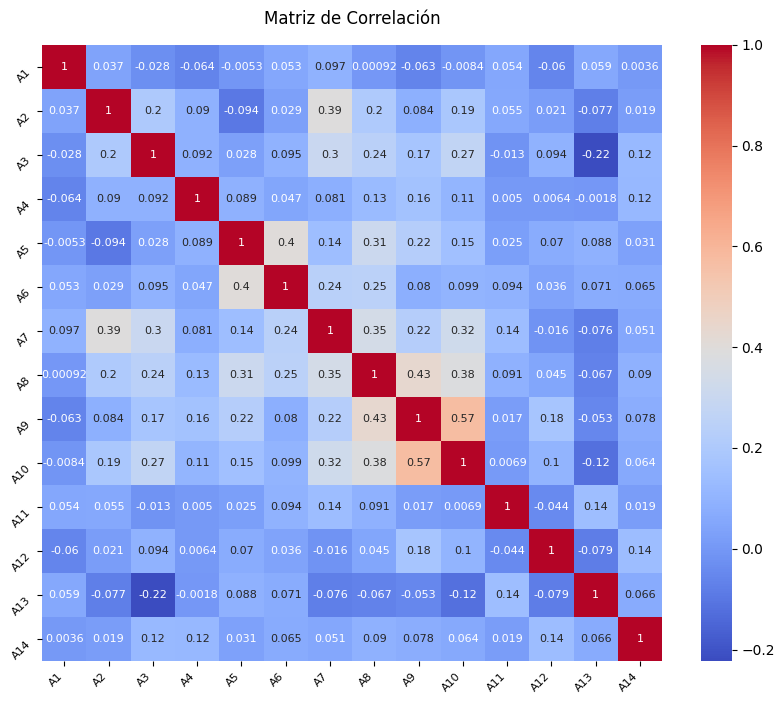

In [59]:
correlation = x.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Matriz de Correlación', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=8)   # rotar los label a 45 grados y alinear su texto
plt.yticks(rotation=45, va='top', fontsize=8)     # rotar los label a 45 grados y alinear su texto
plt.show()

> 👁️‍🗨️ Pareciera haber una correlación media entre `A9` y `A10`.

> 👁️‍🗨️ Pese a ello, con una magnitud de 0.57 entre ambas, no lo considero -a priori- que sea tan grave como para requerir eliminar alguna de estas features como 'duplicada'.

## ✂️ Punto 3. **Preprocesamiento**

### 📋 Consignas:

- Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
- Limpieza: indique cuáles features descarta. Justifique.
- Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
- Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)

Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

### 📝 Resolución:

👉🏻 Característica del dataset ...

> Ya resuelto dentro de la sección `Observaciones` del `Punto 1. Selección del Dataset`.

👉🏻 Missing values ...

> 👁️‍🗨️ Por lo que investigué, el tratamiento de `nulos` y `duplicados` es mejor realizarlo como parte del Análisis Inicial de Datos (IDA), no tanto del Análisis Exploratorio de Datos (EDA).  

> 👁️‍🗨️ Es por ello, que esa parte de las consignas de preprocesamiento las resolví en el `Punto 1`, en lugar del `Punto 3`.  
Más información en la sección `Referencias`.

👉🏻 Tratamiento de **outliers** ...

> Del `Punto 2. EDA` observé que en el dataset existen 110 filas (un 16% del total de la muestra) con al menos 1 outlier.  
Me parece que es mucho para eliminarnos de un plumazo.

> Voy a utilizar un estrategia mixta para con los outliers ...


  - En el caso de los 22 outliers "extremos" a 4+ sigmas (3% de del dataset) procedo a eliminarlos.
  - Con el paso previo ya se incluirán los 10 outliers detectados a 5+ sigmas de la media (1% del dataset).

In [60]:
# boletear los outliers extremos (4+ sigmas)
x = x[~xl_outliers.any(axis=1)]
y = y[~xl_outliers.any(axis=1)]

print(x.shape, y.shape) # 690-22 = 668

(668, 14) (668, 1)


  - Para las 88 observaciones entre 3 a 4 sigmas de la media, procederé a imputarles su rango intercuartíleo.



In [61]:
# las features del tipo 'contínuo'
cols = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']

for col in cols:
  Q1 = x[col].quantile(0.25)
  Q3 = x[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (IQR * 1.5)
  upper_bound = Q3 + (IQR * 1.5)

  # reemplazar los valores extremos con el rango intercuartíleo
  x[col] = x[col].clip(lower=lower_bound, upper=upper_bound)

In [62]:
z_scores = z_score(x)
outliers = np.abs(z_scores) > 3

# contar filas con 1+ outliers
outliers_per_row = outliers.any(axis=1).sum()

print('Filas con 1+ outliers: ', outliers_per_row)
print('Total de outliers:     ', outliers.sum().sum())
print('Detalle por feature:   ', outliers.sum().values)

Filas con 1+ outliers:  61
Total de outliers:      61
Detalle por feature:    [ 0  0  0  0  0  0  0  0  0  0  0 61  0  0]


> 👁️‍🗨️ Los 61 "outliers" que quedan son únicamente sobre `A12` que es del tipo categórica.

> 👁️‍🗨️ De esta manera descarté los casos más "extremos", pero imputando la mayoría de los outliers.

👉🏻 Descarte de features ...

> Del `Punto 2. EDA`, tras la sección de `análisis de correlaciones`... considero mejor de probar utilizando todos las features disponibles.

In [63]:
# si se quisiera eliminar alguna feature del dataset ...
# x = x.drop('A99', axis=1, errors='ignore')
# x.head(3)

👉🏻 Variables categóricas + Escalado de features ...

In [64]:
num_cols = ['A2', 'A3', 'A7', 'A10', 'A13', 'A14']              # columnas 1, 2, 6, 9, 12, 13
cat_cols = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']   # columnas 0, 3, 4, 5, 7, 8, 10, 11

# el preprocesamiento es el mismo para 'regresión logistica' y 'KNN'
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

> 👁️‍🗨️ Voy a aprovechar que en la clase previa vimos el tema de los `pipelines` y hacer esta parte del preprocesamiento haciendo uso de los mismos.


👉🏻 Separar los datos en los conjuntos de entrenamiento y prueba ...  

- Para algoritmos de clasificación, conviene activar la `estratificación` como salvaguarda en caso que las clases estén desbalanceadas.
- Esto analiza el dataset previo a la separación, y garantiza que se preserve el mismo ratio original de clases, sobre los conjuntos de entrenamiento y prueba resultantes.
- Más info al respecto en la sección `Referencias`.

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=1234)

## 🧮 Punto 4. **Clasificación con Logistic Regression**
   

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.

### 🎯 4.1 Entrenamiento y Evaluación

👉🏻 Definir un pipeline para `regresión logística` ...

In [66]:
# pipeline para regresión logística
logreg_pipeline = Pipeline([
  ("preprocessing", preprocessor),
  ("model", LogisticRegression(max_iter=1000))
])

👉🏻 Entrenar el modelo ...

In [67]:
logreg_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['A2', 'A3', 'A7', 'A10',
                                                   'A13', 'A14']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['A1', 'A4', 'A5', 'A6', 'A8',
                                                   'A9', 'A11', 'A12'])])),
                ('model', LogisticRegression(max_iter=1000))])

👉🏻 Las predicciones (conjunto de **entrenamiento**) ...

In [68]:
y_train_pred_logreg = logreg_pipeline.predict(x_train)

👉🏻 Algunas métricas sobre los datos de entrenamiento ...

In [69]:
logreg_train_conf_matrix = confusion_matrix(y_train, y_train_pred_logreg)
logreg_train_accuracy = accuracy_score(y_train, y_train_pred_logreg)
logreg_train_f1_score = f1_score(y_train, y_train_pred_logreg)
logreg_train_report = classification_report(y_train, y_train_pred_logreg)

print("** Regresión Logística **  (conj. de entrenamiento)", "\n")
print("Matriz de confusión:")
print(logreg_train_conf_matrix, "\n")
print("Accuracy: ", round(logreg_train_accuracy, 3))
print("F1-Score: ", round(logreg_train_f1_score, 3), "\n")
print("Reporte: ")
print(logreg_train_report)

** Regresión Logística **  (conj. de entrenamiento) 

Matriz de confusión:
[[262  39]
 [ 27 206]] 

Accuracy:  0.876
F1-Score:  0.862 

Reporte: 
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       301
           1       0.84      0.88      0.86       233

    accuracy                           0.88       534
   macro avg       0.87      0.88      0.88       534
weighted avg       0.88      0.88      0.88       534



### 🎯 4.2 Métricas de Evaluación

Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.  
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.  
Explique los resultados obtenidos.

👉🏻 Las predicciones (conjunto de **test**) ...

In [70]:
y_test_pred_logreg = logreg_pipeline.predict(x_test)

👉🏻 Computar métricas para evaluar el modelo ...

In [71]:
logreg_test_conf_matrix = confusion_matrix(y_test, y_test_pred_logreg)
logreg_test_accuracy = accuracy_score(y_test, y_test_pred_logreg)
logreg_test_f1_score = f1_score(y_test, y_test_pred_logreg)
logreg_test_report = classification_report(y_test, y_test_pred_logreg)

print("** Regresión Logística **  (conj. de test)", "\n")
print("Matriz de confusión:")
print(logreg_test_conf_matrix, "\n")
print("Accuracy: ", round(logreg_test_accuracy, 3))
print("F1-Score: ", round(logreg_test_f1_score, 3), "\n")
print("Reporte: ")
print(logreg_test_report)

** Regresión Logística **  (conj. de test) 

Matriz de confusión:
[[69  6]
 [ 8 51]] 

Accuracy:  0.896
F1-Score:  0.879 

Reporte: 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        75
           1       0.89      0.86      0.88        59

    accuracy                           0.90       134
   macro avg       0.90      0.89      0.89       134
weighted avg       0.90      0.90      0.90       134



### 💡 Observaciones

> 👁️‍🗨️ Detalle de las métricas:
  - Para el conjunto de entrenamiento la `accuracy=0.876` y el `f1-score=0.862`.
  - Para el conjunto de test la `accuracy=0.896` y el `f1-score=0.879`.

> 👁️‍🗨️ Importante señalar que el f1-score ya engloba de forma armónica a las métricas `precisión` y `sensibilidad (recall)`.

> 👁️‍🗨️ Comparando las métricas sobre ambos conjuntos, estas son similares, lo cual es una **buena señal** de que el modelo no tenga overfitting sobre el conjunto de entrenamiento, y que generaliza bastante bien cuando es expuesto a nuevos datos. 😃


## 🔄 Punto 5. **Otro Clasificador**

### 🎯 5.1 Elija otro modelo para entrenar un clasificador


Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

> 👁️‍🗨️ Para el `Punto 4` se solicitó entrenar un modelo de `Regresión Logística`, y en el `Punto 5` voy a estar utilizarzo `K-Nearest Neighbors`. Espero poder mejorar luego el desempeño de `KNN`, durante el tunning en el `Punto 6`.

> 👁️‍🗨️ Ambos son sensibles a la escala de los datos y no manejan bien las variables categóricas codificadas como números (una categoría '4' termina implicando mayor 'distancia' que otra categoría '1').

> 👁️‍🗨️ Me hubiera gustado al `Punto 5` hacerlo con `Arboles` (que lleva un preprocesamiento diferente) pero no está en la lista de algoritmos permitidos. 🤷🏻‍♂️

👉🏻 Definir un pipeline para `K-Nearest Neighbors` ...

- En esta sección voy a tomar un valor de `k=10` arbitrario.
- Luego en el `Punto 6. Tuneo de Hiperparámetros` se busca el valor de `k` más conveniente.

In [72]:
# pipeline para KNN (mismo preprocesador)
knn_pipeline = Pipeline([
  ("preprocessing", preprocessor),
  ("model", KNeighborsClassifier(n_neighbors=10))
])

### 🎯 5.2 Entrenamiento del modelo.

👉🏻 Entrenar el modelo ...

In [73]:
knn_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['A2', 'A3', 'A7', 'A10',
                                                   'A13', 'A14']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['A1', 'A4', 'A5', 'A6', 'A8',
                                                   'A9', 'A11', 'A12'])])),
                ('model', KNeighborsClassifier(n_neighbors=10))])

👉🏻 Las predicciones ...

In [74]:
y_pred_knn = knn_pipeline.predict(x_test)

### 🎯 5.3 Evaluación del Desempeño

👉🏻 Computar métricas para evaluar el modelo ...

In [81]:
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1_score = f1_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)

print("** K-Nearest Neighbors **  (conj. de test, k=10)", "\n")
print("Matriz de confusión:")
print(knn_conf_matrix, "\n")
print("Accuracy: ", round(knn_accuracy, 3))
print("F1-Score: ", round(knn_f1_score, 3), "\n")
print("Reporte: ")
print(knn_report)

** K-Nearest Neighbors **  (conj. de test, k=10) 

Matriz de confusión:
[[70  5]
 [21 38]] 

Accuracy:  0.806
F1-Score:  0.745 

Reporte: 
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        75
           1       0.88      0.64      0.75        59

    accuracy                           0.81       134
   macro avg       0.83      0.79      0.79       134
weighted avg       0.82      0.81      0.80       134



### 💡 Observaciones

> 👁️‍🗨️ Detalle de las métricas (test):
  - En el caso de `K-Nearest Neighbors` logró una `accuracy=0.806` y un `f1-score=0.745`.
  - Por otro lado, la `Regresión Logística` del punto previo ya había logrado una `accuracy=0.896` y un `f1-score=0.879`.

> 👁️‍🗨️ Hasta el momento la `Regresión Logística` del `Punto 4` me resulta favorecida...

> 👁️‍🗨️ No obstante lo anterior, en el siguiente `Punto 6`, buscaré de aumentar la calidad del modelo a ver hasta donde logro que llegue ... 💪🏻

## ⚖️ Punto 6. **Tuneo de Hiperparámetros**

### 📋 Consignas:

En esta sección debe modificar/probar cómo la modificación de un hiperparámetro del modelo elegido en `Punto 5` afecta en los resultados.

Justifique y realice el experimento en esta sección.

### 📝 Resolución:

👉🏻 Probar con distintos valores de `k` ...  

> Para hacer una evaluación bien completa, voy a probar usando `validación cruzada` (a 5 bloques), tanto por exactitud, como por f1-score (presición y sensibilidad).

In [76]:
cv_accuracy_scores = []
cv_f1_scores = []

k_values = range(1, 11)
for k in k_values:

  pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=k))
  ])

  # validación cruzada (5 bloques)
  cv_accuracy = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='accuracy')  # accuracy
  cv_accuracy_scores.append(cv_accuracy.mean())   # la media entre los 5 bloques

  cv_f1_score = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='f1')        # f1-score
  cv_f1_scores.append(cv_f1_score.mean())         # nuevamente, guardo la media

👉🏻 Mostrar el mejor modelo ...

In [77]:
# indice del mayor (más es mejor) en el array 'cv_accuracy_scores'
best_accuracy_idx = np.argmax(cv_accuracy_scores)

# mostrar el mejor modelo
best_accuracy_k = k_values[best_accuracy_idx]
best_accuracy_value = cv_accuracy_scores[best_accuracy_idx]
print(f"En accuracy el mejor modelo resultó para k={ best_accuracy_k }, valor={ round(best_accuracy_value, 4) }")

En accuracy el mejor modelo resultó para k=7, valor=0.8389


In [78]:
# indice del mayor (más es mejor) en el array 'cv_accuracy_scores'
best_f1_idx = np.argmax(cv_f1_scores)

# mostrar el mejor modelo
best_f1_k = k_values[best_f1_idx]
best_f1_value = cv_f1_scores[best_f1_idx]
print(f"En f1-score el mejor modelo resultó para k={ best_f1_k }, valor={ round(best_f1_value, 4) }")

En f1-score el mejor modelo resultó para k=7, valor=0.806


👉🏻 Graficar los resultados ...

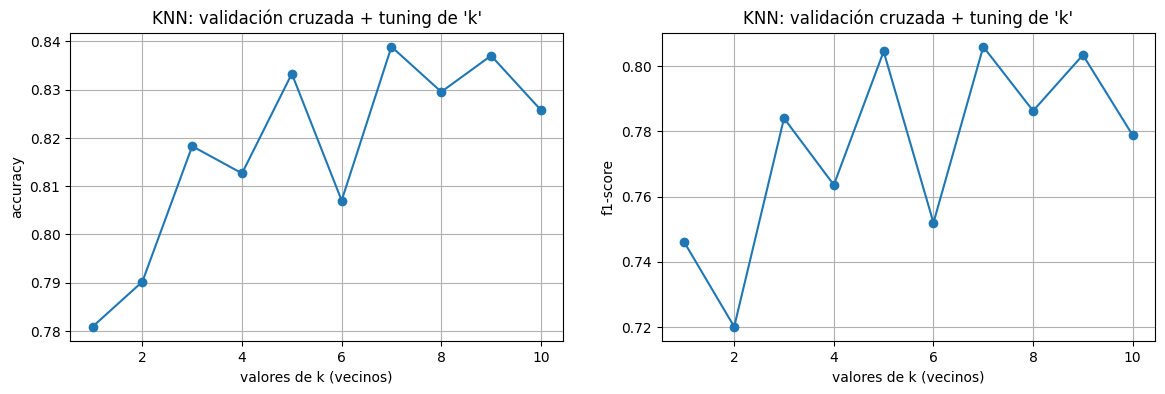

In [79]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)    # 1 fila, 2 columnas
plt.plot(k_values, cv_accuracy_scores, marker='o')
plt.title("KNN: validación cruzada + tuning de 'k'")
plt.xlabel("valores de k (vecinos)")
plt.ylabel("accuracy")  # exactitud
plt.grid(True)

plt.subplot(1, 2, 2)    # 1 fila, 2 columnas
plt.plot(k_values, cv_f1_scores, marker='o')
plt.title("KNN: validación cruzada + tuning de 'k'")
plt.xlabel("valores de k (vecinos)")
plt.ylabel("f1-score")  # f1-score (presición + sensibilidad)
plt.grid(True)

plt.show()

> 👁️‍🗨️ De la `validación cruzada` a 5 bloques, tanto en `accuracy` como con `f1-score` (presición y sensibilidad) el mejor valor posible resulta `k=7`.
  - En `accuracy` el mejor modelo resultó para `k=7`, con un resultado de `0.8389`
  - En `f1-score` el mejor modelo resultó para `k=7`, con un resultado de `0.8060`

> 👁️‍🗨️ Se observa del gráfico que `k=5` y `k=9` también presentan resultados bastante cercanos al óptimo.

👉🏻 Voy a volver a volver a ejecutar el mismo código del `Punto 5`, ahora con `k=7`, para comparar resultados luego del `Tunning` ...

👉🏻 Va el mismo código (pero sin tanto bla-bla-bla de por medio en esta ocasión)...

In [82]:
knn_pipeline = Pipeline([
  ("preprocessing", preprocessor),
  ("model", KNeighborsClassifier(n_neighbors=7))  # valor óptimo: k=7
])

knn_pipeline.fit(x_train, y_train)
y_pred_knn_tunning = knn_pipeline.predict(x_test)

knn_tunning_conf_matrix = confusion_matrix(y_test, y_pred_knn_tunning)
knn_tunning_accuracy = accuracy_score(y_test, y_pred_knn_tunning)
knn_tunning_f1_score = f1_score(y_test, y_pred_knn_tunning)
knn_tunning_report = classification_report(y_test, y_pred_knn_tunning)

print("** K-Nearest Neighbors **  (conj. de test, k=7)", "\n")
print("Matriz de confusión:")
print(knn_tunning_conf_matrix, "\n")
print("Accuracy: ", round(knn_tunning_accuracy, 3))
print("F1-Score: ", round(knn_tunning_f1_score, 3), "\n")
print("Reporte: ")
print(knn_tunning_report)

** K-Nearest Neighbors **  (conj. de test, k=7) 

Matriz de confusión:
[[71  4]
 [15 44]] 

Accuracy:  0.858
F1-Score:  0.822 

Reporte: 
              precision    recall  f1-score   support

           0       0.83      0.95      0.88        75
           1       0.92      0.75      0.82        59

    accuracy                           0.86       134
   macro avg       0.87      0.85      0.85       134
weighted avg       0.87      0.86      0.86       134



### 💡 Observaciones

> 👁️‍🗨️ Detalle de las métricas (test):
  - En el caso del `K-Nearest Neighbors` de base, con el `k=10` arbitrario logró una `accuracy=0.806` y un `f1-score=0.745`.
  - Por otro lado, habiendo determinado el `k=7` como óptimo las métricas mejoraron un poco hasta una `accuracy=0.858` y un `f1-score=0.822`.

## 💡 Punto 7. **Conclusiones**

Fundamente, justifique con sus palabras.

### 📝 Conclusiones:

👉🏻 Resultados finales (conjunto de test):

- Mediante `Regresión Logística` se logra una `accuracy=0.896` y un `f1-score=0.879`.

- En el caso del `K-Nearest Neighbors` de base, con el `k=10` arbitrario, se logró una `accuracy=0.806` y un `f1-score=0.745`.

- Luego del tunning, `K-Nearest Neighbors` con un `k=7` se logró una `accuracy=0.858` y un `f1-score=0.822`.

👉🏻 Tunning del **K-Nearest Neighbors** ...

> 👁️‍🗨️ Habiendo determinado a `k=7` como valor óptimo, sus métricas mejoraron algo, aunque no de manera drástica.

👉🏻 **Regresión Logística** vs **K-Nearest Neighbors** ...

> 👁️‍🗨️ Para este dataset en particular recomendaría utilizar el modelo entrenado mediante `Regresión Logística`, ya que su desempeño resulta levemente superior.

👉🏻 Adicionalmente ...

> 👁️‍🗨️ Esta última preferencia no es solamente por los resultados de las métricas levemente superiores, sino también por otra cuestión más teórica: de lo visto en clase, `KNN` puede tornarse "pesado" computacionalmente a medida que el volumen de datos crece.

> 👁️‍🗨️ Me anoté como lineamiento gral. que ante eventuales paridades en la calidad (aclarar igualmente que no es este caso), buscar de evitar los `KNN`, que si bien este dataset de muestreo es manejable, en un entorno productivo me imagino que podría haber bastante más datos.

## 📚 Referencias

- Dataset: 'Australian Credit Approval'  
  https://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval

- Workflow: Análisis Inicial de Datos (IDA) + Análisis Exploratorio de Datos (EDA)  
  https://millev.com/analisis-exploratorio-de-datos-2/

- Elección de algoritmos para clasificación (tolerancia a outliers y nivel de preprocesamiento requerido)  
  https://chatgpt.com/share/683261c7-3600-8001-b209-9ee81f1ebb76

- Uso de estratificación cuando las clases están desbalanceadas  
  https://scikit-learn.org/stable/modules/cross_validation.html#stratification

- Notebooks de la materia: vistas en clase y del campus virtual.